In [1]:
import sklearn
import pandas as pd
import pickle
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from sklearn.inspection import PartialDependenceDisplay
from pdpbox.pdp import pdp_isolate, pdp_interact, pdp_interact_plot, pdp_plot
from mlxtend.plotting import plot_decision_regions
from sklearn.inspection import permutation_importance

### Load test dataset

In [2]:
X_headers = ['Employed','Years_Employed','Income','Debt','Credit_Score','Prior_Default']
Y_headers = ['Approved']

In [3]:
X_test =  pd.read_csv('./x_test.csv', header = None, names = X_headers)
Y_test =  pd.read_csv('./y_test.csv', header = None, names = Y_headers)

In [4]:
X_test.shape, Y_test.shape

((173, 6), (173, 1))

<Figure size 432x288 with 0 Axes>

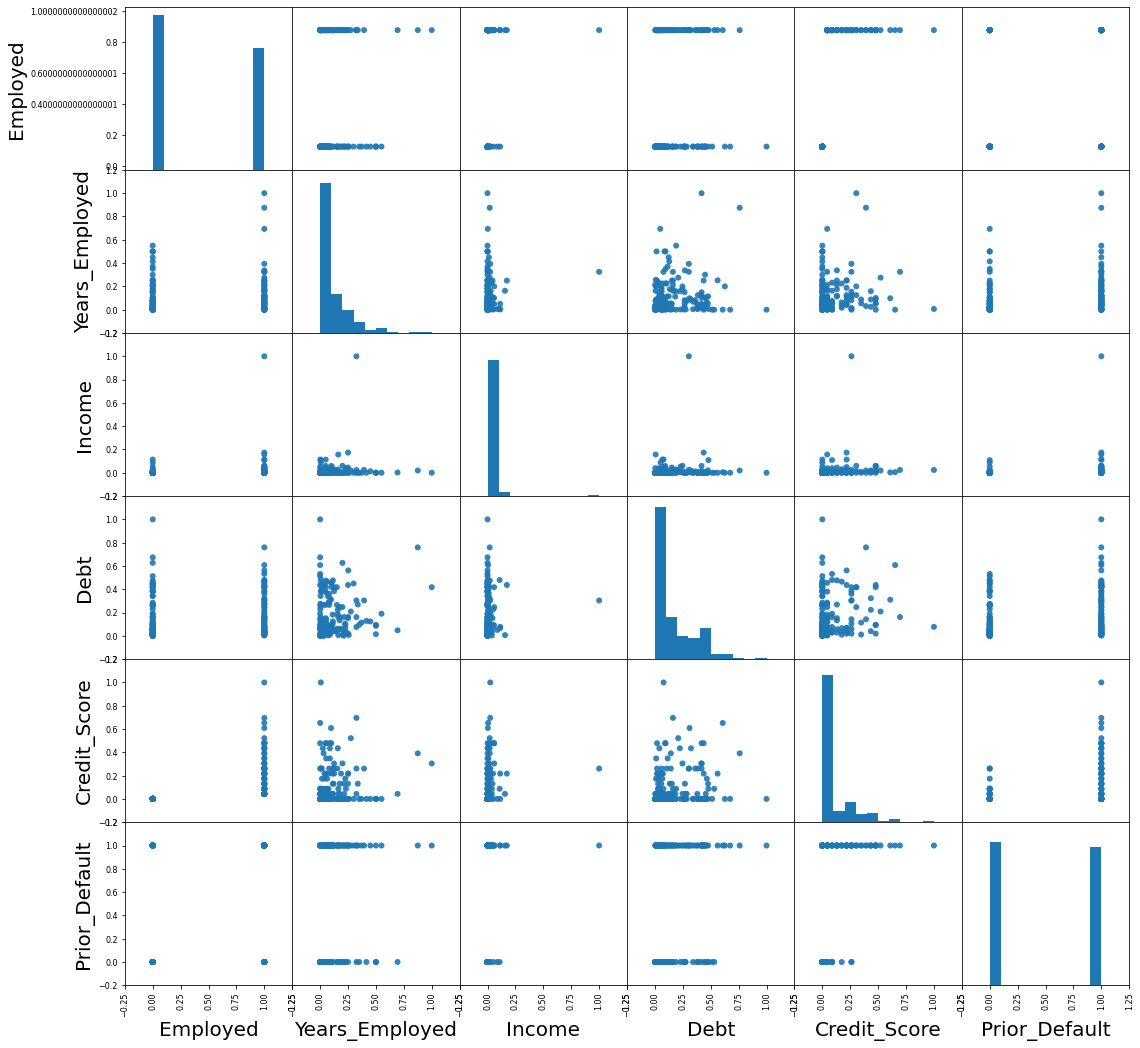

In [5]:
fig = plt.figure()
scatter_matrix = pd.plotting.scatter_matrix(X_test, figsize=(18,18), marker='o', alpha=0.9)

for ax in scatter_matrix.ravel():
    ax.set_xlabel(ax.get_xlabel(), fontsize = 20 )
    ax.set_ylabel(ax.get_ylabel(), fontsize = 20)
    ax.set_xticks(ax.get_xticks(), fontsize = 20)
    ax.set_yticks(ax.get_yticks(), fontsize = 20)


## Load the trained model

In [6]:
loaded_model = pickle.load(open('./model_B.sav', 'rb'))
result = loaded_model.score(X_test, Y_test)
print(result)

0.8670520231213873


## Inspect the decision boundary of the mode

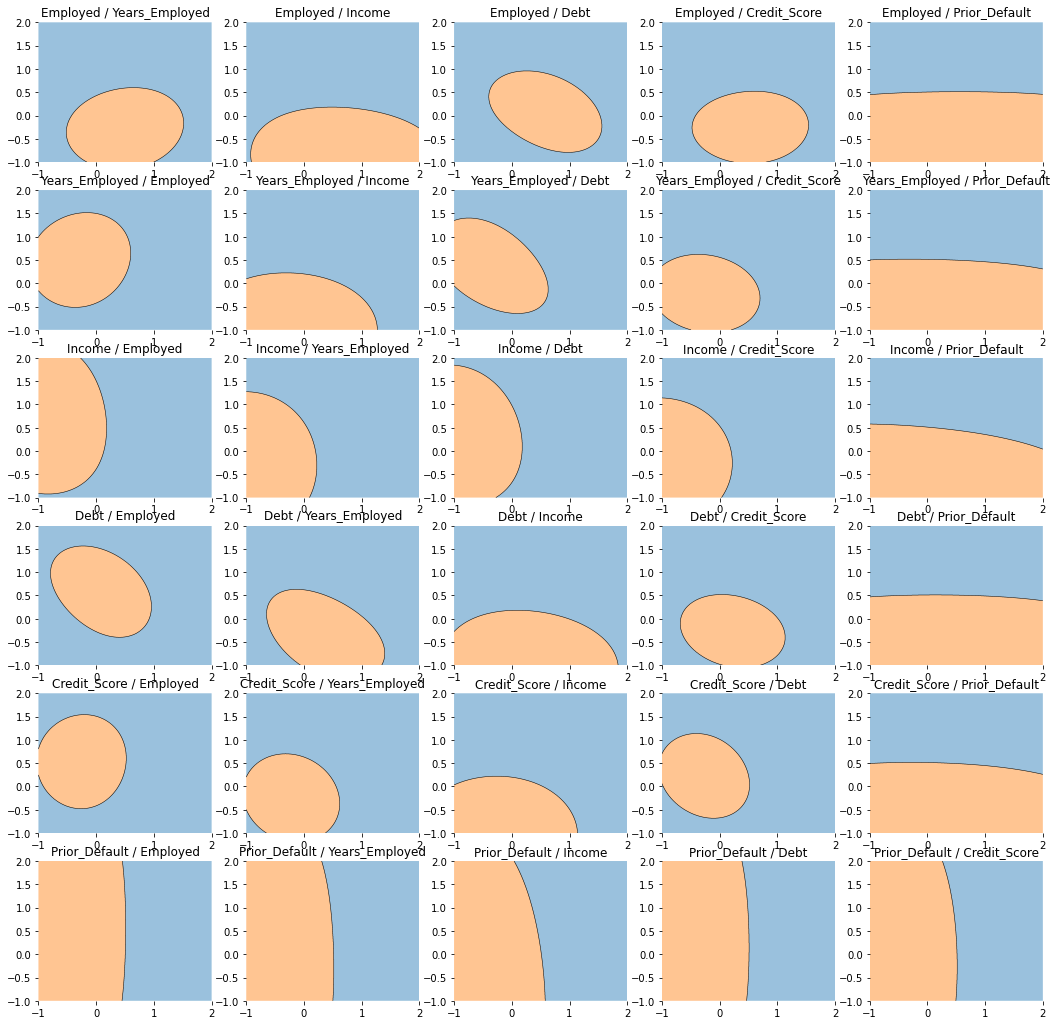

In [7]:
fig, axarr = plt.subplots(6, 5, figsize=(18,18))
axes = axarr.flatten()
c = 0
for i in range(6):
    for j in range(6):
        if i != j:
            # feature_index to plot
            feature_index=[i,j]

            feature_values = {i:np.mean(X_test.values[:, i]) for i in range(0, 6)}  
            k = [v for v in feature_values if v not in feature_index]
            v = [feature_values[v] for v in feature_values if v not in feature_index]

            plot_decision_regions(X_test.values,Y_test.to_numpy().astype(np.int).ravel(), clf=loaded_model,
                                        feature_index = feature_index,
                                        filler_feature_values = dict(zip(k,v)),
                                        ax= axes[c])
      
            axes[c].set_title(X_test.columns[i] + ' / '+ X_test.columns[j], fontsize = 12)
            c +=1
fig.savefig('./images/ModelB_DecisionBoundary.svg', bbox_inches='tight')

## Accumulated Local Effects (ALE) Plot

In [7]:
from alibi.explainers import ALE
from alibi.explainers import plot_ale
import numpy as np


In [8]:
ale = ALE(loaded_model.predict_proba, feature_names=X_test.columns, target_names=Y_test.columns)

In [9]:
exp = ale.explain(X_test.values)

array([[<AxesSubplot:xlabel='Employed', ylabel='ALE'>,
        <AxesSubplot:xlabel='Years_Employed', ylabel='ALE'>,
        <AxesSubplot:xlabel='Income', ylabel='ALE'>],
       [<AxesSubplot:xlabel='Debt', ylabel='ALE'>,
        <AxesSubplot:xlabel='Credit_Score', ylabel='ALE'>,
        <AxesSubplot:xlabel='Prior_Default', ylabel='ALE'>]], dtype=object)

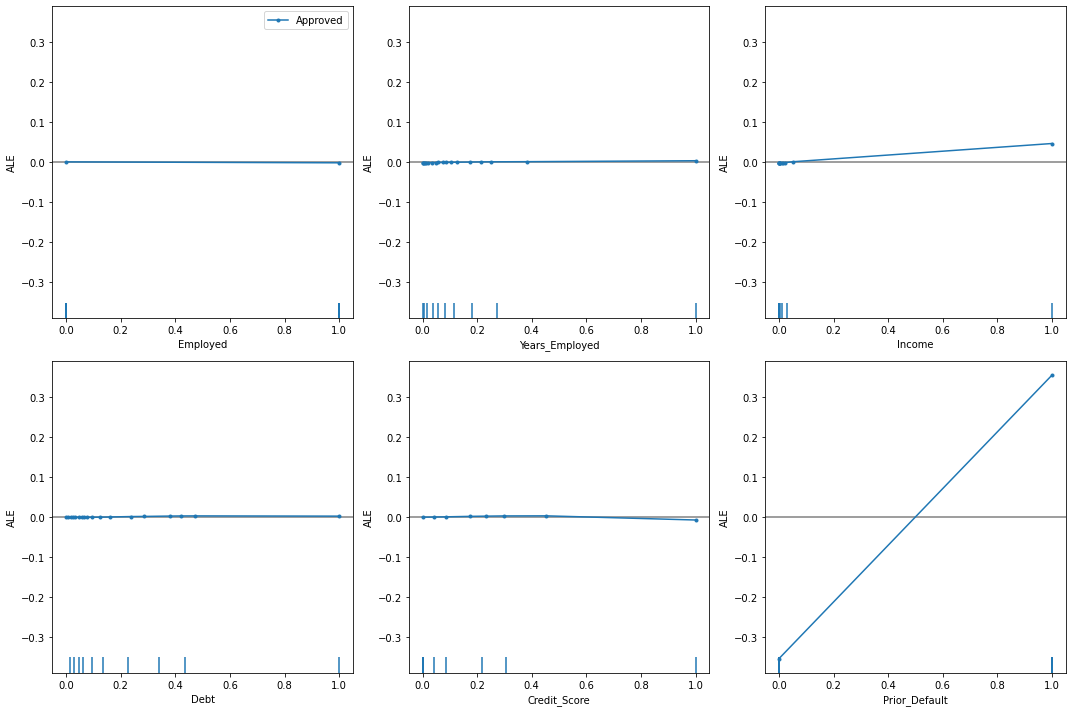

In [10]:
plot_ale(exp, fig_kw={'figwidth':15, 'figheight':10})